In [140]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [141]:
df=pd.read_csv(r"C:\Users\rajak\OneDrive\Documents\DATA\Data_Science\PROJECTS\Placement\Placement_Data_Full_Class.csv")

In [142]:
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [143]:
df.shape

(215, 15)

In [144]:
#Checking for null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [145]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [146]:
df.drop(columns=['sl_no'],inplace=True)

In [147]:
#Splitting up the Categorical and Numerical variables
cat_var=list(df.select_dtypes(include=['object']).columns)
num_var=list(df.select_dtypes(include=['int64','float64']).columns)

In [148]:
print(cat_var,num_var)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'] ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [149]:
#Describing the DataFrame
df.describe().T

count           mean           std        min         25%       50%  \
ssc_p     215.0      67.303395     10.827205      40.89      60.600      67.0   
hsc_p     215.0      66.333163     10.897509      37.00      60.900      65.0   
degree_p  215.0      66.370186      7.358743      50.00      61.000      66.0   
etest_p   215.0      72.100558     13.275956      50.00      60.000      71.0   
mba_p     215.0      62.278186      5.833385      51.21      57.945      62.0   
salary    148.0  288655.405405  93457.452420  200000.00  240000.000  265000.0   

                 75%        max  
ssc_p         75.700      89.40  
hsc_p         73.000      97.70  
degree_p      72.000      91.00  
etest_p       83.500      98.00  
mba_p         66.255      77.89  
salary    300000.000  940000.00

# Handling the Null values

In [150]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [151]:
df['status'][(df['status']=='Not Placed')].count()

67

In [152]:
df.drop('salary',axis=1,inplace=True)

In [153]:
df.sample(10)

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
64       M  80.00   Others   73.0   Others  Commerce     75.00  Comm&Mgmt   
36       M  51.00  Central   44.0  Central  Commerce     57.00  Comm&Mgmt   
133      M  73.00  Central   64.0   Others  Commerce     77.00  Comm&Mgmt   
34       M  62.00   Others   51.0   Others   Science     52.00     Others   
84       M  70.00  Central   63.0   Others   Science     70.00   Sci&Tech   
81       M  81.70   Others   63.0   Others   Science     67.00  Comm&Mgmt   
43       M  87.00   Others   87.0   Others  Commerce     68.00  Comm&Mgmt   
77       M  64.00   Others   80.0   Others   Science     65.00   Sci&Tech   
24       M  76.50   Others   97.7   Others   Science     78.86   Sci&Tech   
67       M  80.92   Others   78.5   Others  Commerce     67.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status  
64      No    61.00        Mkt&Fin  58.78      Placed  
36      No    64.00        Mkt&Fin  51.45  Not Placed  
133    Yes    65.00         Mkt&HR  60.98      Placed  
34      No    68.44         Mkt&HR  62.77  Not Placed  
84     Yes    55.00        Mkt&Fin  62.00      Placed  
81     Yes    86.00        Mkt&Fin  70.20      Placed  
43      No    95.00         Mkt&HR  62.90      Placed  
77     Yes    69.00        Mkt&Fin  57.65      Placed  
24      No    97.40        Mkt&Fin  74.01      Placed  
67      No    68.71        Mkt&Fin  60.99      Placed

# Explolatory Data Analysis:

<AxesSubplot: xlabel='status', ylabel='count'>

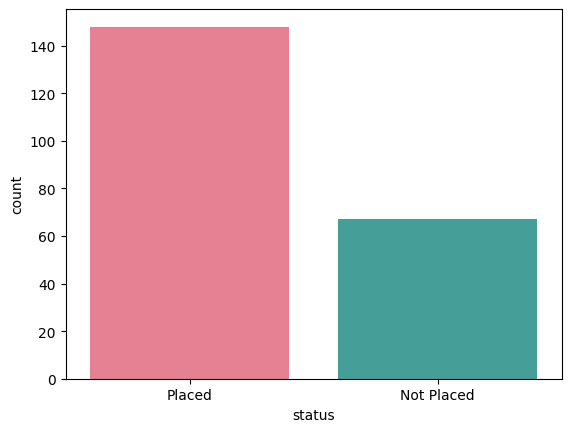

In [154]:
sns.countplot(x=df['status'],palette='husl')

In [155]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot: xlabel='degree_t', ylabel='count'>

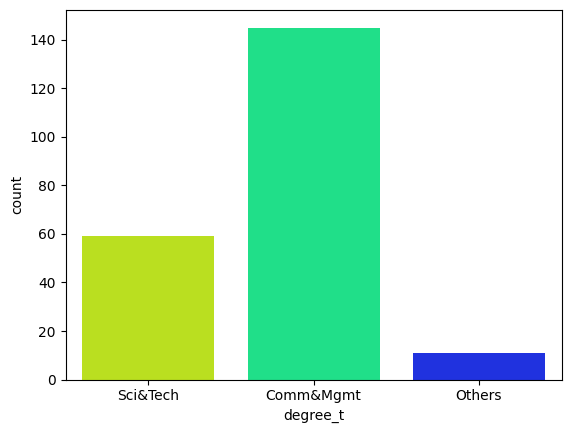

In [156]:

sns.countplot(x=df['degree_t'],palette='gist_rainbow')

<AxesSubplot: xlabel='workex', ylabel='count'>

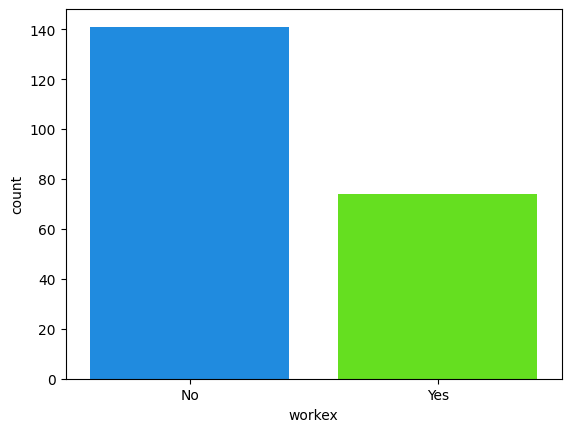

In [157]:

sns.countplot(x=df['workex'],palette='gist_rainbow_r')

<AxesSubplot: xlabel='hsc_s', ylabel='count'>

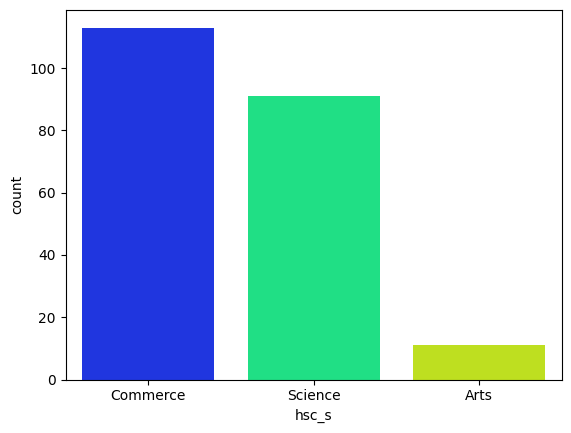

In [158]:
sns.countplot(x=df['hsc_s'],palette='gist_rainbow_r')

<AxesSubplot: xlabel='hsc_b', ylabel='count'>

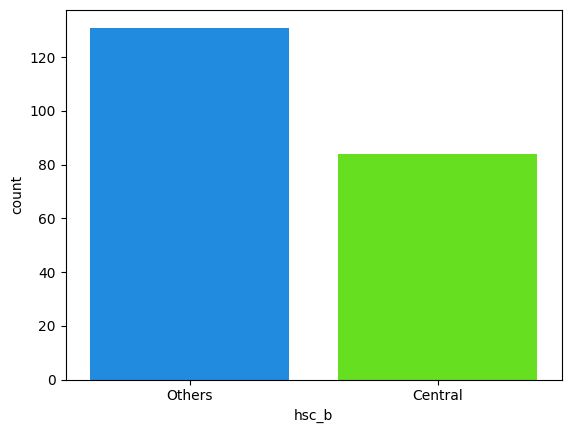

In [159]:
sns.countplot(x=df['hsc_b'],palette='gist_rainbow_r')

<AxesSubplot: xlabel='specialisation', ylabel='count'>

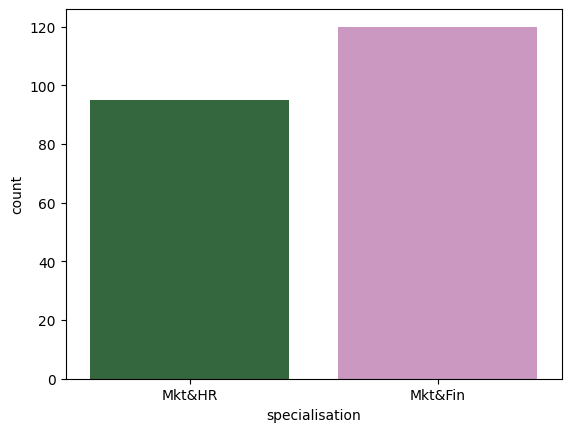

In [160]:
sns.countplot(x=df['specialisation'],palette='cubehelix')

In [161]:
def valuecount(col):
    
    return dict(df[col].value_counts())

In [162]:
getfinaldict = {}
for col in cat_var:
    getfinaldict[col] = valuecount(col)
   

In [163]:
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

<AxesSubplot: xlabel='degree_t'>

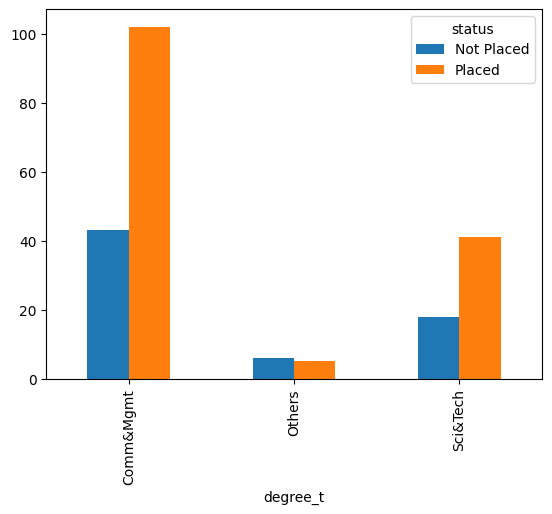

In [164]:


pd.crosstab(df['degree_t'],df['status']).plot(kind='bar')

    

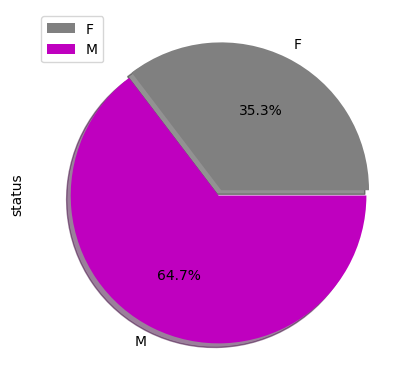

In [165]:
# Percentage of male and female 
fig,ax=plt.subplots()

explode = (0.03,0.01)
colors=['grey','m']
df.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%0.01f%%',ax=ax,explode=explode,colors=colors,shadow=True)
plt.legend()
plt.show()


In [166]:
import scipy
from scipy import stats


In [167]:
def num_plot(df,col):
    plt.figure(figsize=(16,9))
    plt.subplot(1,3,1)
    plt.hist(df[col])
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col])
    
    plt.show()

In [168]:
num_var=list(df.select_dtypes(include=['int64','float64']).columns)
num_var

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

Distribution plots for col : ssc_p are shown ↓


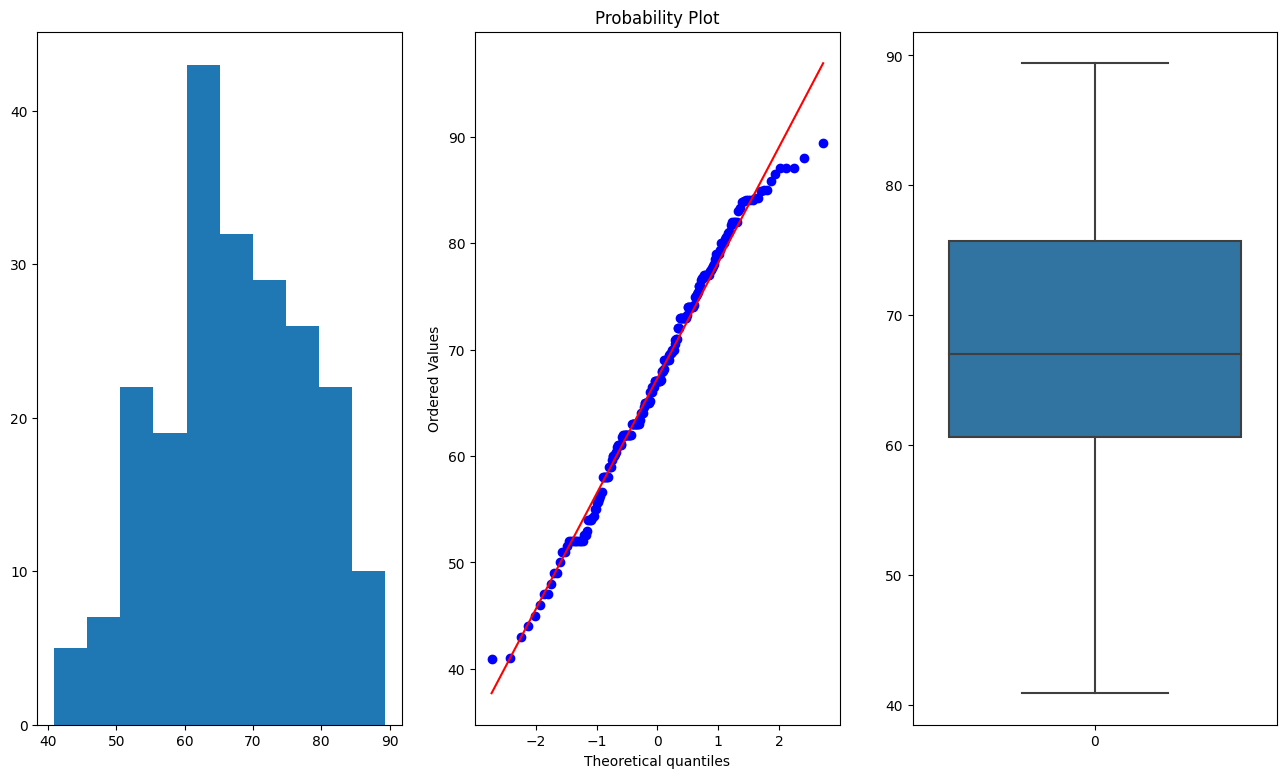

Distribution plots for col : hsc_p are shown ↓


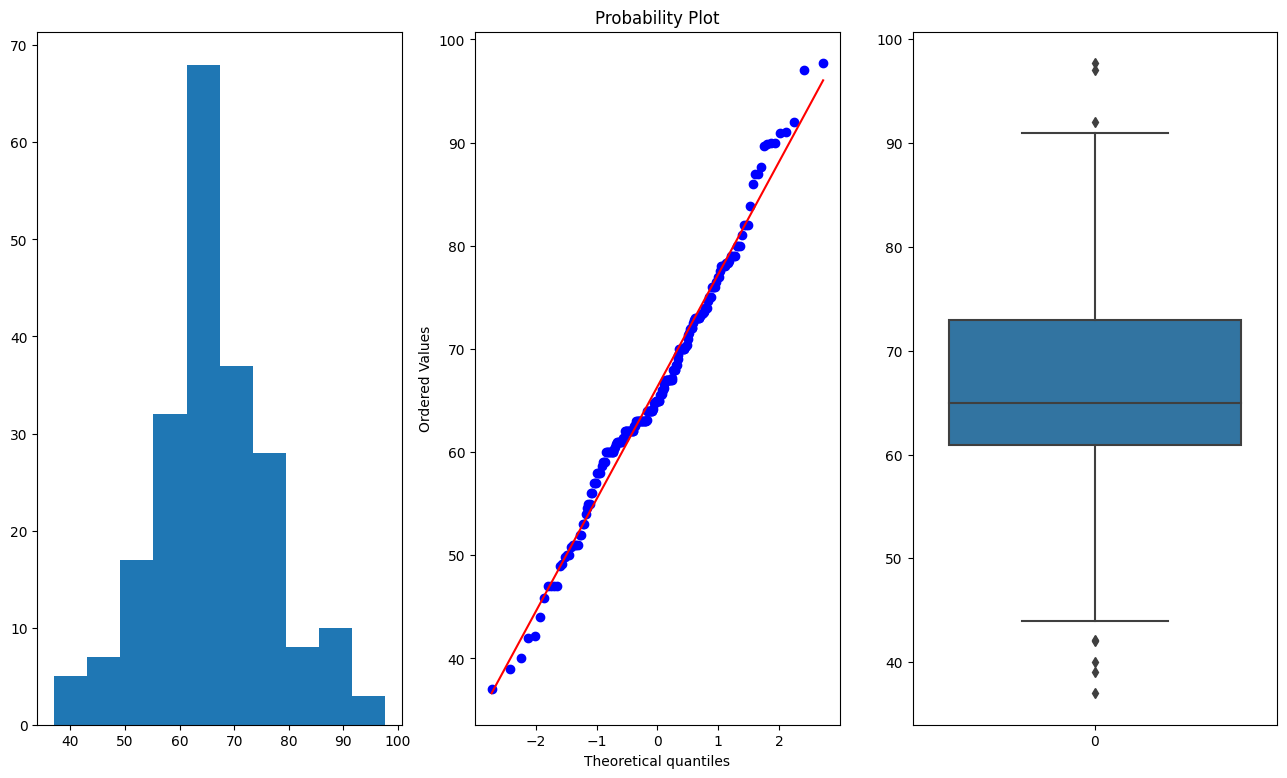

Distribution plots for col : degree_p are shown ↓


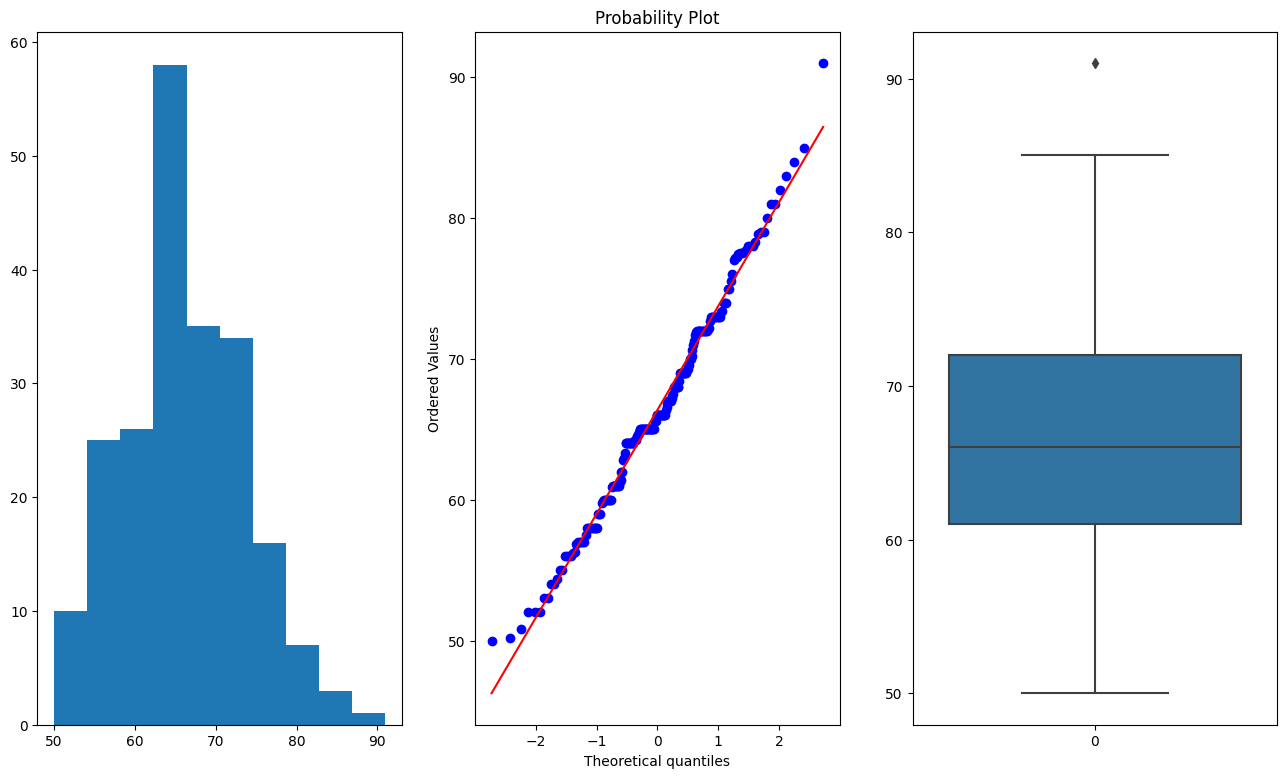

Distribution plots for col : etest_p are shown ↓


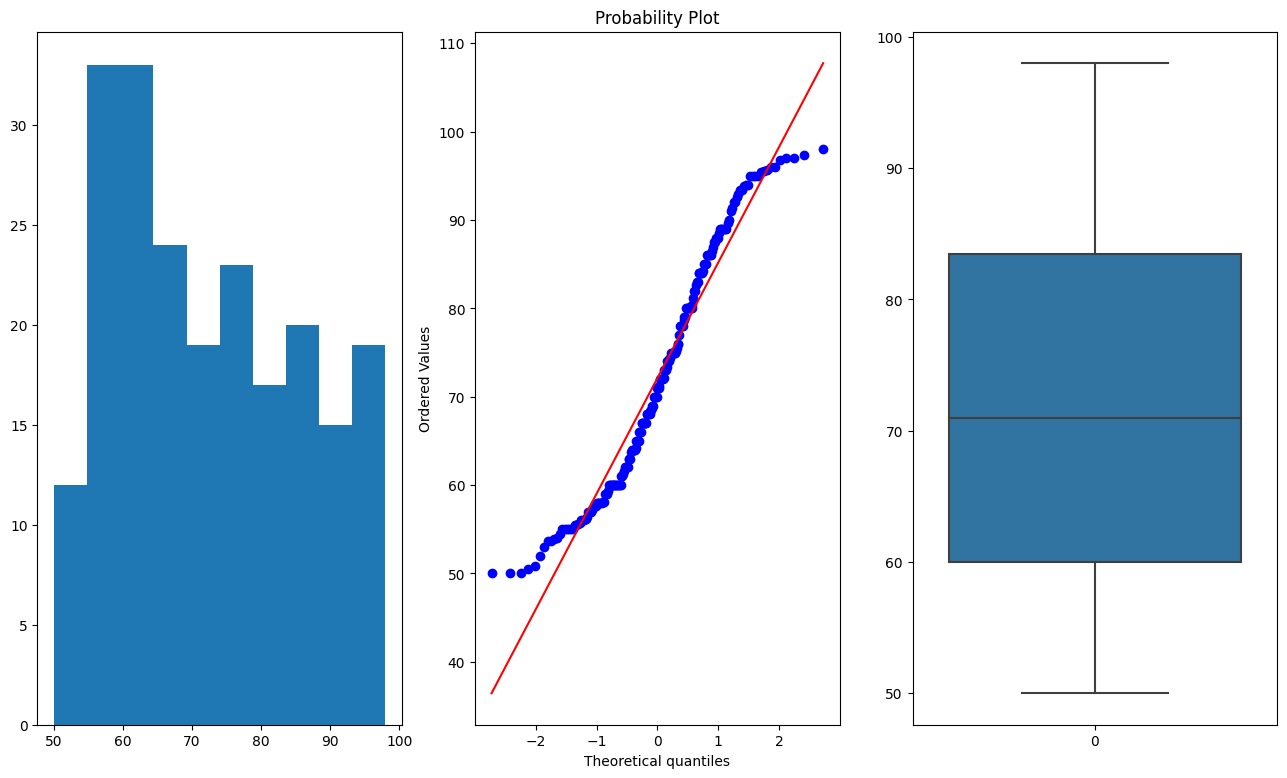

Distribution plots for col : mba_p are shown ↓


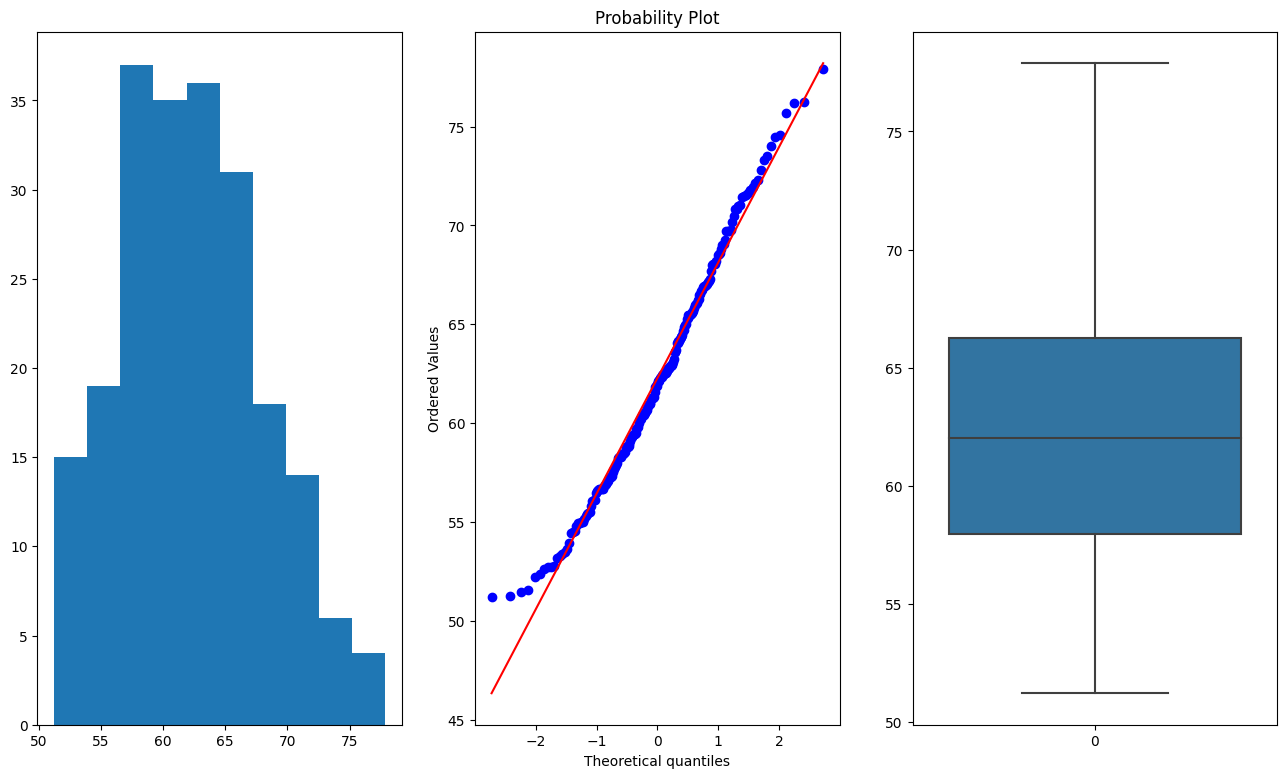

In [169]:
for i in num_var[:]:
    print(f'Distribution plots for col : {i} are shown ↓')
    num_plot(df,i)
    print('='*10)



# Handling Categorical Variables

In [170]:
cat_var=list(df.select_dtypes(include='object').columns)
cat_var

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [171]:
def Encoder(le,col):
    
    df[col] = le.fit_transform(df[col])
    
    
getmappings = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_var:
    Encoder(le,col)
    getmappings[col] = dict(zip(le.classes_,le.transform(le.classes_)))

df.head()


gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       1  67.00      1  91.00      1      1     58.00         2       0   
1       1  79.33      0  78.33      1      2     77.48         2       1   
2       1  65.00      0  68.00      0      0     64.00         0       0   
3       1  56.00      0  52.00      0      2     52.00         2       0   
4       1  85.80      0  73.60      0      1     73.30         0       0   

   etest_p  specialisation  mba_p  status  
0     55.0               1  58.80       1  
1     86.5               0  66.28       1  
2     75.0               0  57.80       1  
3     66.0               1  59.43       0  
4     96.8               0  55.50       1

In [172]:
getmappings

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

# Feature Selection

In [173]:
df.shape

(215, 13)

<AxesSubplot: >

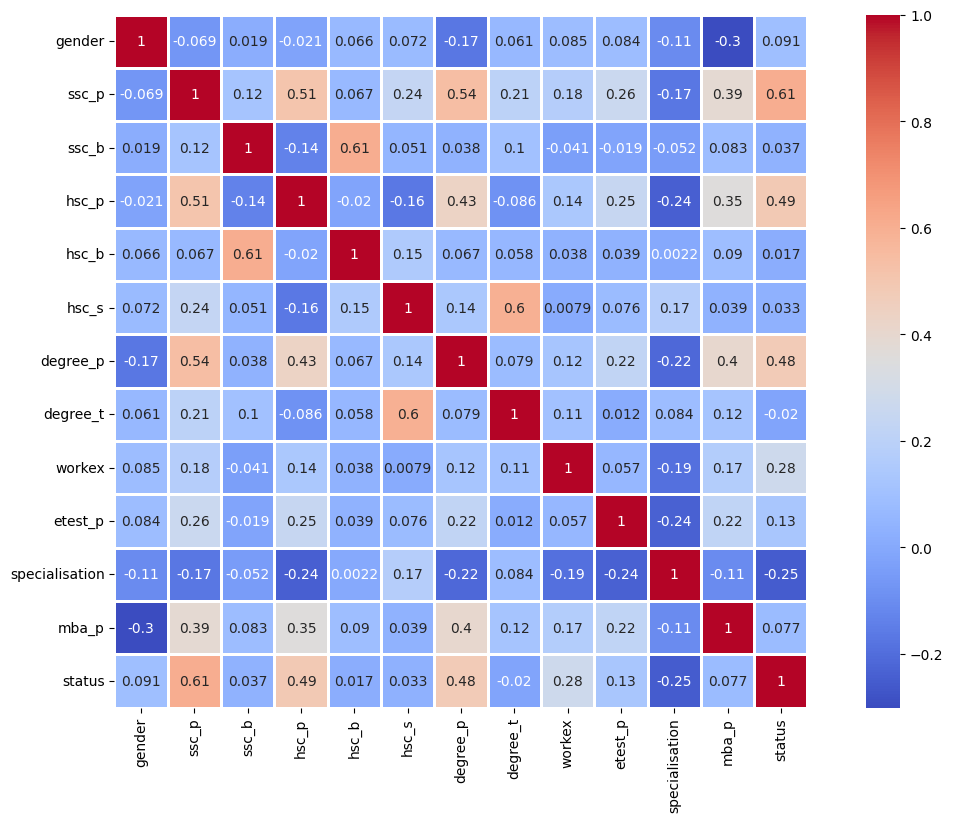

In [174]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidth=2,square=True)

In [175]:
df1=df.copy()
test=df1['status']
train=df1.drop('status',axis=1)

In [176]:
from sklearn.ensemble import ExtraTreesClassifier

In [177]:

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

In [178]:





imp_feat = pd.Series(ec.feature_importances_,index=train.columns)

<AxesSubplot: >

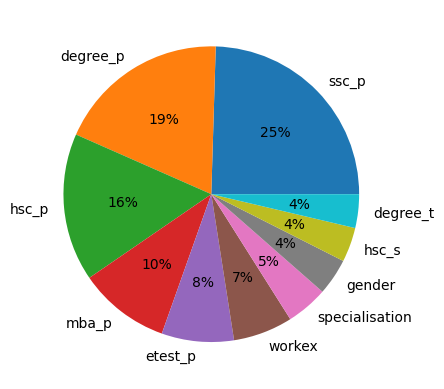

In [179]:


imp_feat.nlargest(10).plot(kind='pie',autopct='%1.0f%%')

In [180]:
from sklearn.feature_selection import mutual_info_classif
mic=mutual_info_classif(train,test)
imp_feat_mc=pd.Series(mic,index=train.columns)

<AxesSubplot: >

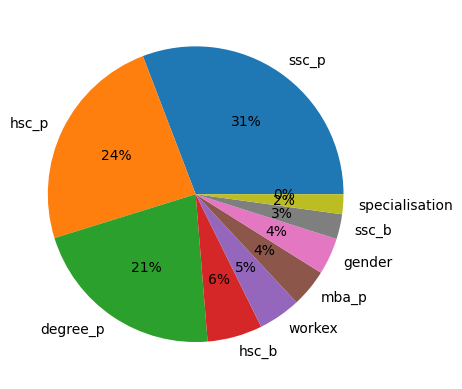

In [181]:
imp_feat_mc.nlargest(10).plot(kind='pie',autopct='%1.0f%%')

In [182]:
cl_col = list(imp_feat.nlargest(10).index)
mut_col = list(imp_feat_mc.nlargest(10).index)
commoncols = list(set(cl_col).intersection(set(mut_col)))
print(commoncols)

['specialisation', 'mba_p', 'hsc_p', 'degree_p', 'workex', 'hsc_s', 'gender', 'ssc_p']


In [183]:
train=df[commoncols]


In [184]:
train.shape,test.shape

((215, 8), (215,))

In [185]:
df.sample(4)

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
12        0   47.0      0   55.0      1      2      65.0         0       0   
55        1   60.4      0   66.6      1      2      65.0         0       0   
131       0   74.9      1   57.0      1      2      62.0         1       1   
56        1   63.0      1   71.4      1      1      61.4         0       0   

     etest_p  specialisation  mba_p  status  
12      62.0               1  65.04       0  
55      71.0               1  52.71       1  
131     80.0               0  60.78       1  
56      68.0               0  66.88       1

# Model Fitting

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV
from sklearn import metrics

In [187]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=33)

In [188]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((172, 8), (172,), (43, 8), (43,))

In [189]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
clf4=DecisionTreeClassifier()
clf5=XGBClassifier()

In [190]:
estimators= [('lr',clf1),('rf',clf2),('knn',clf3),('dt',clf4),('xgb',clf5)]

In [191]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X_train,y_train,cv=5,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),5))

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

lr 0.8721
rf 0.90689
knn 0.88353
dt 0.83731
xgb 0.87227


# With HyperParameter Tunning

In [192]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },  
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':range(1, 10, 2),
            'weights':['uniform', 'distance'],
            'metric':['euclidean', 'manhattan', 'minkowski'],
            'leaf_size':list(range(1,50))
        }
    }
}   

In [193]:
# scores=[]
# for model_name,para in params.items():
#     model_f=GridSearchCV(para['model'],param_grid=para['params'],cv=5,n_jobs=-1,scoring='accuracy')
#     model_f.fit(X_train,y_train)
#     scores.append({
#         'model_name':model_name,
#         'best_score':model_f.best_score_,
#         'best_estimator':model_f.best_estimator_
#     })
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rajak\AppData\Local\Programs\Pytho

In [194]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8835294117647059,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.019, max_depth=8, min_samples_leaf=2,
                         min_samples_split=5, n_estimators=933)},
 {'model_name': 'logistic',
  'best_score': 0.8549579831932773,
  'best_estimator': LogisticRegression(C=0.5, max_iter=84, multi_class='multinomial', tol=0.25)},
 {'model_name': 'D-tree',
  'best_score': 0.8485714285714285,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.0185, max_features='auto',
                         min_samples_leaf=12, min_samples_split=12)},
 {'model_name': 'KNN',
  'best_score': 0.8895798319327731,
  'best_estimator': KNeighborsClassifier(metric='manhattan', weights='distance')}]

In [195]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

model_name  best_score                                     best_estimator
0  RandomForest    0.883529  (DecisionTreeClassifier(ccp_alpha=0.019, max_d...
1      logistic    0.854958  LogisticRegression(C=0.5, max_iter=84, multi_c...
2        D-tree    0.848571  DecisionTreeClassifier(ccp_alpha=0.0185, max_f...
3           KNN    0.889580  KNeighborsClassifier(metric='manhattan', weigh...

In [200]:
rf=RandomForestClassifier(ccp_alpha=0.02, max_depth=22, max_features='auto',
                         min_samples_leaf=2, min_samples_split=5,
                         n_estimators=533)
rf.fit(X_train,y_train)
y_hat=rf.predict(X_test)
metrics.accuracy_score(y_test,y_hat)


C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.813953488372093

In [132]:
knn=KNeighborsClassifier(leaf_size=48, metric='euclidean')
knn.fit(X_train,y_train)
y_hat=rf.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.7674418604651163

In [133]:
lg=LogisticRegression(max_iter=250, solver='newton-cg', tol=0.25)
lg.fit(X_train,y_train)
y_hat=rf.predict(X_test)
metrics.accuracy_score(y_test,y_hat)

0.7674418604651163

In [134]:
dc = DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5, splitter='random')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.813953488372093


C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [135]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.78      0.89      0.83        28

    accuracy                           0.77        43
   macro avg       0.75      0.71      0.72        43
weighted avg       0.76      0.77      0.76        43



<AxesSubplot: >

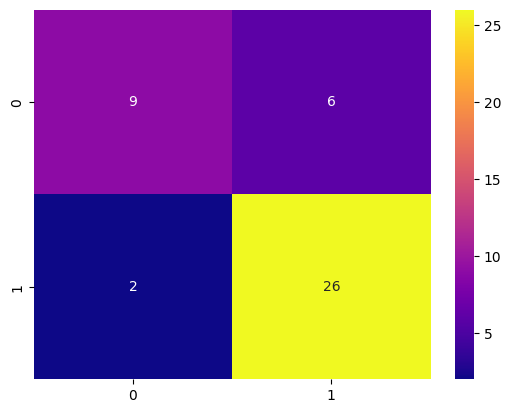

In [201]:
con_mat = metrics.confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(con_mat,annot=True,cmap='plasma')

# Testing Data

In [202]:
# np.array(train)
train

specialisation  mba_p  hsc_p  degree_p  workex  hsc_s  gender  ssc_p
0                 1  58.80  91.00     58.00       0      1       1  67.00
1                 0  66.28  78.33     77.48       1      2       1  79.33
2                 0  57.80  68.00     64.00       0      0       1  65.00
3                 1  59.43  52.00     52.00       0      2       1  56.00
4                 0  55.50  73.60     73.30       0      1       1  85.80
..              ...    ...    ...       ...     ...    ...     ...    ...
210               0  74.49  82.00     77.60       0      1       1  80.60
211               0  53.62  60.00     72.00       0      2       1  58.00
212               0  69.72  67.00     73.00       1      1       1  67.00
213               1  60.23  66.00     58.00       0      1       0  74.00
214               1  60.22  58.00     53.00       0      2       1  62.00

[215 rows x 8 columns]

In [224]:
status_hat=[]
data=np.array(train)
for i in range(len(data)):
    status_hat.append(rf.predict([data[i]]))
    

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

In [225]:
status_hat

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [228]:
result_df=train.copy()
result_df['Actual']=np.array(test)
result_df['Predicted']=np.array(status_hat)
result_df

specialisation  mba_p  hsc_p  degree_p  workex  hsc_s  gender  ssc_p  \
0                 1  58.80  91.00     58.00       0      1       1  67.00   
1                 0  66.28  78.33     77.48       1      2       1  79.33   
2                 0  57.80  68.00     64.00       0      0       1  65.00   
3                 1  59.43  52.00     52.00       0      2       1  56.00   
4                 0  55.50  73.60     73.30       0      1       1  85.80   
..              ...    ...    ...       ...     ...    ...     ...    ...   
210               0  74.49  82.00     77.60       0      1       1  80.60   
211               0  53.62  60.00     72.00       0      2       1  58.00   
212               0  69.72  67.00     73.00       1      1       1  67.00   
213               1  60.23  66.00     58.00       0      1       0  74.00   
214               1  60.22  58.00     53.00       0      2       1  62.00   

     Actual  Predicted  
0         1          1  
1         1          1  
2         1          1  
3         0          0  
4         1          1  
..      ...        ...  
210       1          1  
211       1          1  
212       1          1  
213       1          1  
214       0          0  

[215 rows x 10 columns]

In [229]:
#In terms of Probability
status_hat=[]
data=np.array(train)
for i in range(len(data)):
    status_hat.append(rf.predict_proba([data[i]]))

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\rajak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

In [230]:
status_hat

[array([[0.27765622, 0.72234378]]),
 array([[0.05982632, 0.94017368]]),
 array([[0.1662359, 0.8337641]]),
 array([[0.8743507, 0.1256493]]),
 array([[0.06571958, 0.93428042]]),
 array([[0.78805364, 0.21194636]]),
 array([[0.77164335, 0.22835665]]),
 array([[0.08424543, 0.91575457]]),
 array([[0.06857416, 0.93142584]]),
 array([[0.41292644, 0.58707356]]),
 array([[0.35587901, 0.64412099]]),
 array([[0.06698229, 0.93301771]]),
 array([[0.88353801, 0.11646199]]),
 array([[0.24655477, 0.75344523]]),
 array([[0.70075418, 0.29924582]]),
 array([[0.07611987, 0.92388013]]),
 array([[0.09048722, 0.90951278]]),
 array([[0.66289229, 0.33710771]]),
 array([[0.48766837, 0.51233163]]),
 array([[0.11400414, 0.88599586]]),
 array([[0.11984169, 0.88015831]]),
 array([[0.07603213, 0.92396787]]),
 array([[0.15773274, 0.84226726]]),
 array([[0.1498409, 0.8501591]]),
 array([[0.09063333, 0.90936667]]),
 array([[0.85095739, 0.14904261]]),
 array([[0.06966319, 0.93033681]]),
 array([[0.11293065, 0.88706935]])

In [240]:
status_hat[1][0][1]

0.940173681536154

In [242]:
result_df['prob_placed']=np.array([status_hat[i][0][1] for i in range(len(status_hat)) ])
result_df['prob_not_placed']=np.array([status_hat[i][0][0] for i in range(len(status_hat)) ])

In [243]:
result_df.head()

specialisation  mba_p  hsc_p  degree_p  workex  hsc_s  gender  ssc_p  \
0               1  58.80  91.00     58.00       0      1       1  67.00   
1               0  66.28  78.33     77.48       1      2       1  79.33   
2               0  57.80  68.00     64.00       0      0       1  65.00   
3               1  59.43  52.00     52.00       0      2       1  56.00   
4               0  55.50  73.60     73.30       0      1       1  85.80   

   Actual  Predicted  prob_placed  prob_not_placed  
0       1          1     0.722344         0.277656  
1       1          1     0.940174         0.059826  
2       1          1     0.833764         0.166236  
3       0          0     0.125649         0.874351  
4       1          1     0.934280         0.065720

In [251]:
result_df.shape[0]

215

In [250]:
count=0
for i in range(result_df.shape[0]):
    if result_df['Actual'][i]!=result_df['Predicted'][i]:
        count+=1
count

24

In [245]:
import pickle 
pickle.dump(rf,open(r"C:\Users\rajak\OneDrive\Documents\DATA\Data_Science\PROJECTS\Placement\Placement_Data.pkl",'wb'))

# Conclusion

* Out of 215 records only 24 records are missclassified